In [1]:
import pandas as pd
import json

file_path = 'experiments_results_RF_LEARNING_CURVE/all_results.json'

with open(file_path, 'r') as file:
    data_list = json.load(file)

df_list = []

for entry in data_list:
    # Flattening the 'results_train' and 'results_test' dictionaries
    flat_entry = {**entry, **entry.pop('results_train'), **entry.pop('results_test')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)

numeric_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
                   'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
df[numeric_columns] = df[numeric_columns].round(4)

df.head()


,date,algorithm,dataset,labeled_size,hyperparameters,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,training_time
0,2023-12-04 14:57:15,RandomForestClassifier,cifar10,0.03,{},1.0,1.0,1.0,1.0,0.5910,0.6029,0.533,0.5658,0.5624
1,2023-12-04 14:57:17,RandomForestClassifier,cifar10,0.03,{},1.0,1.0,1.0,1.0,0.6035,0.6124,0.564,0.5872,0.6194
2,2023-12-04 14:57:19,RandomForestClassifier,cifar10,0.03,{},1.0,1.0,1.0,1.0,0.5860,0.5913,0.557,0.5736,0.5655
3,2023-12-04 14:57:20,RandomForestClassifier,cifar10,0.03,{},1.0,1.0,1.0,1.0,0.5695,0.5761,0.526,0.5499,0.6118
4,2023-12-04 14:57:22,RandomForestClassifier,cifar10,0.03,{},1.0,1.0,1.0,1.0,0.5930,0.5891,0.615,0.6018,0.5779


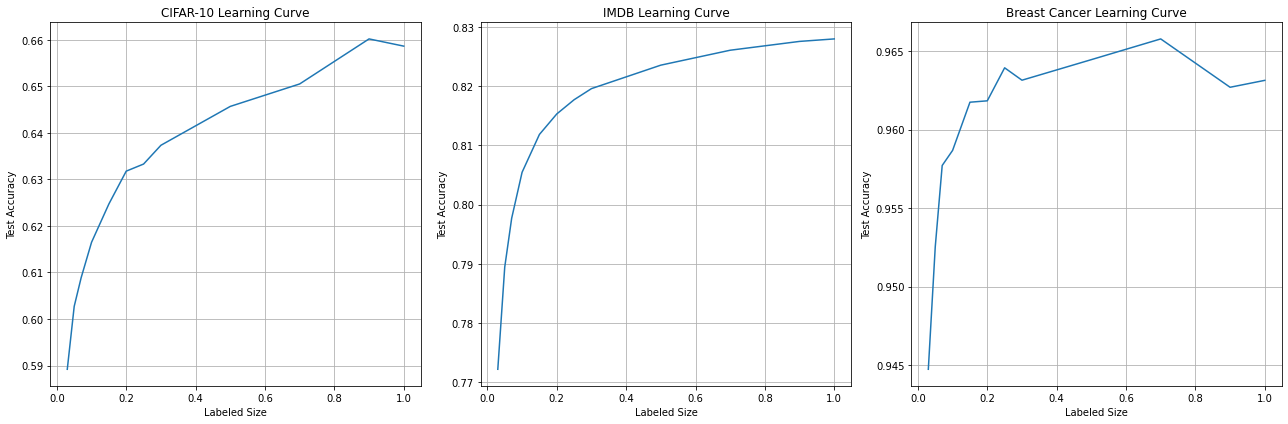

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for plotting
plot_data = df.groupby(['dataset', 'labeled_size'])['test_accuracy'].mean().reset_index()

# Separate data for each dataset
cifar10_data = plot_data[plot_data['dataset'] == 'cifar10']
imdb_data = plot_data[plot_data['dataset'] == 'imdb']
breast_cancer_data = plot_data[plot_data['dataset'] == 'breast_cancer']

# Creating plots
plt.figure(figsize=(18, 6))

# CIFAR-10 Plot
plt.subplot(1, 3, 1)
sns.lineplot(data=cifar10_data, x='labeled_size', y='test_accuracy')
plt.title('CIFAR-10 Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# IMDB Plot
plt.subplot(1, 3, 2)
sns.lineplot(data=imdb_data, x='labeled_size', y='test_accuracy')
plt.title('IMDB Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# Breast Cancer Plot
plt.subplot(1, 3, 3)
sns.lineplot(data=breast_cancer_data, x='labeled_size', y='test_accuracy')
plt.title('Breast Cancer Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# Adjusting layout
plt.tight_layout()
# Display the plots
plt.show()


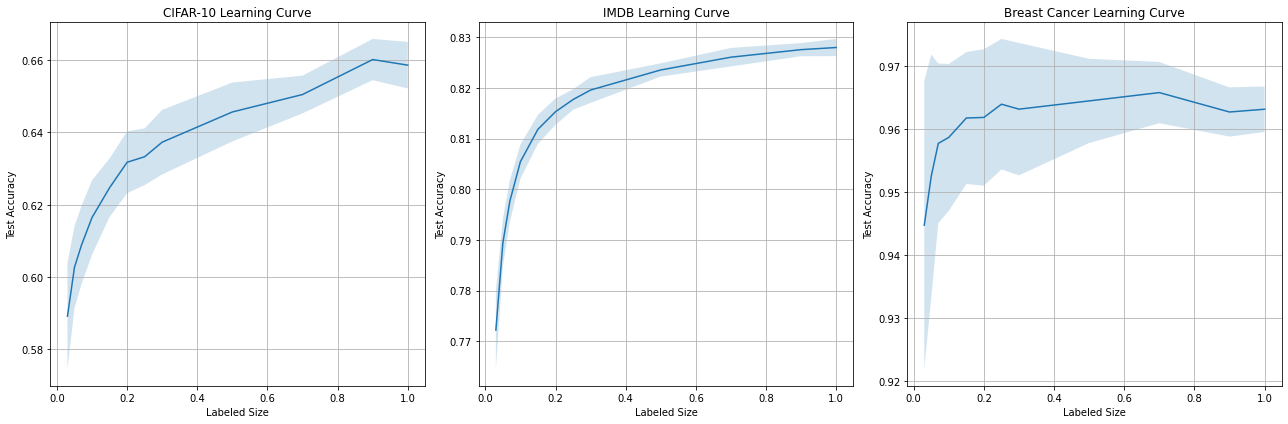

In [3]:
# Calculating mean and standard deviation for test accuracy for each labeled size in each dataset
grouped_data = df.groupby(['dataset', 'labeled_size'])['test_accuracy']
mean_std_data = grouped_data.agg(['mean', 'std']).reset_index()

# Separate data for each dataset with mean and standard deviation
cifar10_mean_std = mean_std_data[mean_std_data['dataset'] == 'cifar10']
imdb_mean_std = mean_std_data[mean_std_data['dataset'] == 'imdb']
breast_cancer_mean_std = mean_std_data[mean_std_data['dataset'] == 'breast_cancer']

# Creating plots with standard deviation
plt.figure(figsize=(18, 6))

# CIFAR-10 Plot with Standard Deviation
plt.subplot(1, 3, 1)
sns.lineplot(data=cifar10_mean_std, x='labeled_size', y='mean')
plt.fill_between(cifar10_mean_std['labeled_size'], 
                 cifar10_mean_std['mean'] - cifar10_mean_std['std'], 
                 cifar10_mean_std['mean'] + cifar10_mean_std['std'], 
                 alpha=0.2)
plt.title('CIFAR-10 Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# IMDB Plot with Standard Deviation
plt.subplot(1, 3, 2)
sns.lineplot(data=imdb_mean_std, x='labeled_size', y='mean')
plt.fill_between(imdb_mean_std['labeled_size'], 
                 imdb_mean_std['mean'] - imdb_mean_std['std'], 
                 imdb_mean_std['mean'] + imdb_mean_std['std'], 
                 alpha=0.2)
plt.title('IMDB Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# Breast Cancer Plot with Standard Deviation
plt.subplot(1, 3, 3)
sns.lineplot(data=breast_cancer_mean_std, x='labeled_size', y='mean')
plt.fill_between(breast_cancer_mean_std['labeled_size'], 
                 breast_cancer_mean_std['mean'] - breast_cancer_mean_std['std'], 
                 breast_cancer_mean_std['mean'] + breast_cancer_mean_std['std'], 
                 alpha=0.2)
plt.title('Breast Cancer Learning Curve')
plt.xlabel('Labeled Size')
plt.ylabel('Test Accuracy')
plt.grid()

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()


In [4]:
cifar10_mean_std

,dataset,labeled_size,mean,std
12,cifar10,0.03,0.589190,0.014688
13,cifar10,0.05,0.602715,0.011360
14,cifar10,0.07,0.608865,0.010815
15,cifar10,0.10,0.616480,0.010287
16,cifar10,0.15,0.624715,0.008081
17,cifar10,0.20,0.631765,0.008554
18,cifar10,0.25,0.633290,0.007837
19,cifar10,0.30,0.637325,0.008939
20,cifar10,0.50,0.645675,0.008144
21,cifar10,0.70,0.650500,0.005219


In [5]:
imdb_mean_std

,dataset,labeled_size,mean,std
24,imdb,0.03,0.772177,0.007727
25,imdb,0.05,0.789431,0.004737
26,imdb,0.07,0.797686,0.004088
27,imdb,0.10,0.805447,0.003382
28,imdb,0.15,0.811839,0.002863
29,imdb,0.20,0.815300,0.002606
30,imdb,0.25,0.817703,0.002030
31,imdb,0.30,0.819580,0.002542
32,imdb,0.50,0.823545,0.001312
33,imdb,0.70,0.826065,0.001824


In [6]:
breast_cancer_mean_std

,dataset,labeled_size,mean,std
0,breast_cancer,0.03,0.944734,0.022870
1,breast_cancer,0.05,0.952541,0.019284
2,breast_cancer,0.07,0.957717,0.012672
3,breast_cancer,0.10,0.958678,0.011647
4,breast_cancer,0.15,0.961748,0.010473
5,breast_cancer,0.20,0.961836,0.010833
6,breast_cancer,0.25,0.963939,0.010360
7,breast_cancer,0.30,0.963150,0.010509
8,breast_cancer,0.50,0.964460,0.006681
9,breast_cancer,0.70,0.965780,0.004862


In [12]:
import pandas as pd
import json

file_path = 'experiments_results_base_parameters_wroclaw_003_labeled/all_results.json'

with open(file_path, 'r') as file:
    data = file.read()

corrected_data = data.replace("}{", "},{")

json_data = "[" + corrected_data + "]"

df_list = []
for entry in json.loads(json_data):
    flat_entry = {**entry, **entry.pop('results_train'), **entry.pop('results_test')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)
numeric_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
                   'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
df[numeric_columns] = df[numeric_columns].round(4)
df[['algorithm','dataset', 'labeled_size', 'test_accuracy', 'training_time']][df['dataset']=='cifar10']

,algorithm,dataset,labeled_size,test_accuracy,training_time
0,Tri_Training,cifar10,0.03,0.5915,113.5337
3,Assemble,cifar10,0.03,0.5745,1603.1930
6,SemiBoost,cifar10,0.03,0.5010,570.6689


In [13]:
df[['algorithm','dataset', 'labeled_size', 'test_accuracy', 'training_time']][df['dataset']=='imdb']

,algorithm,dataset,labeled_size,test_accuracy,training_time
1,Tri_Training,imdb,0.03,0.8074,7.5889
4,Assemble,imdb,0.03,0.6392,6408.9442
7,SemiBoost,imdb,0.03,0.5000,20724.3959


In [14]:
df[['algorithm','dataset', 'labeled_size', 'test_accuracy', 'training_time']][df['dataset']=='breast_cancer']

,algorithm,dataset,labeled_size,test_accuracy,training_time
2,Tri_Training,breast_cancer,0.03,0.9386,0.2519
5,Assemble,breast_cancer,0.03,0.9386,62.3256
8,SemiBoost,breast_cancer,0.03,0.6579,9.8330


In [16]:
import pandas as pd
import json

file_path = 'experiments_results_tritraining_base_parameters_wroclaw_005_labeled/all_results.json'

with open(file_path, 'r') as file:
    data = file.read()

corrected_data = data.replace("}{", "},{")

json_data = "[" + corrected_data + "]"

df_list = []
for entry in json.loads(json_data):
    flat_entry = {**entry, **entry.pop('results_train'), **entry.pop('results_test')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)
numeric_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
                   'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
df[numeric_columns] = df[numeric_columns].round(4)
df.head()

,date,algorithm,dataset,labeled_size,hyperparameters,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,training_time
0,2023-12-05 15:46:35,Tri_Training,imdb,0.05,"{'base_estimator': RandomForestClassifier(), '...",0.9224,0.9217,0.9232,0.9225,0.8247,0.8351,0.8093,0.8220,7.8803
1,2023-12-05 15:46:56,Tri_Training,imdb,0.05,"{'base_estimator': RandomForestClassifier(), '...",0.9328,0.9356,0.9296,0.9326,0.8276,0.8351,0.8164,0.8256,7.6403
2,2023-12-05 15:47:17,Tri_Training,imdb,0.05,"{'base_estimator': RandomForestClassifier(), '...",0.9264,0.9171,0.9376,0.9272,0.8273,0.8343,0.8167,0.8254,7.4713
3,2023-12-05 15:47:37,Tri_Training,imdb,0.05,"{'base_estimator': RandomForestClassifier(), '...",0.9352,0.9359,0.9344,0.9351,0.8246,0.8367,0.8066,0.8213,7.6164
4,2023-12-05 15:47:58,Tri_Training,imdb,0.05,"{'base_estimator': RandomForestClassifier(), '...",0.9224,0.9272,0.9168,0.9220,0.8190,0.8316,0.8000,0.8155,7.6682


In [20]:
grouped_data = df.groupby(['dataset'])['test_accuracy']
mean_std_data = grouped_data.agg(['mean', 'std']).reset_index()

mean_std_data

,dataset,mean,std
0,breast_cancer,0.957362,0.016247
1,cifar10,0.581000,0.013995
2,imdb,0.824074,0.003922
